# Embeddings: Text --> Vectorial representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

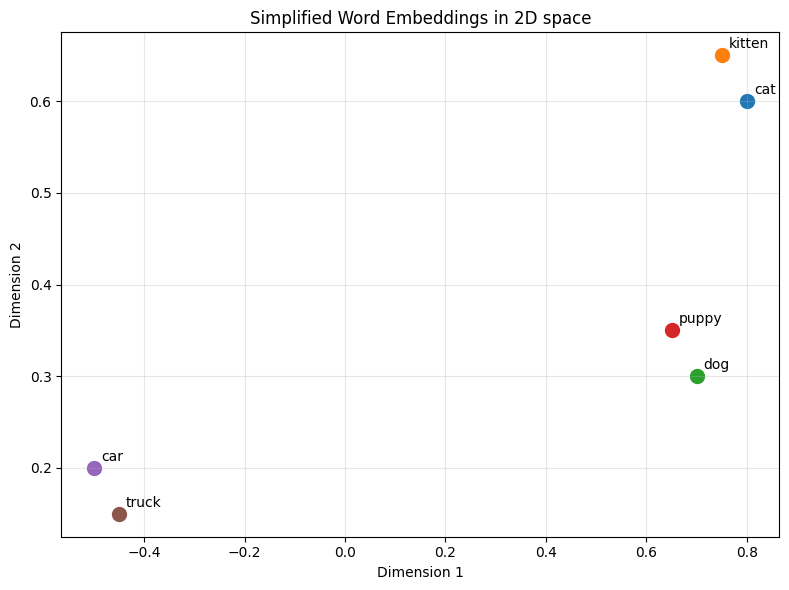

In [2]:
#Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

fig, ax = plt.subplots(figsize=(8,6))

for word,coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5,5), textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


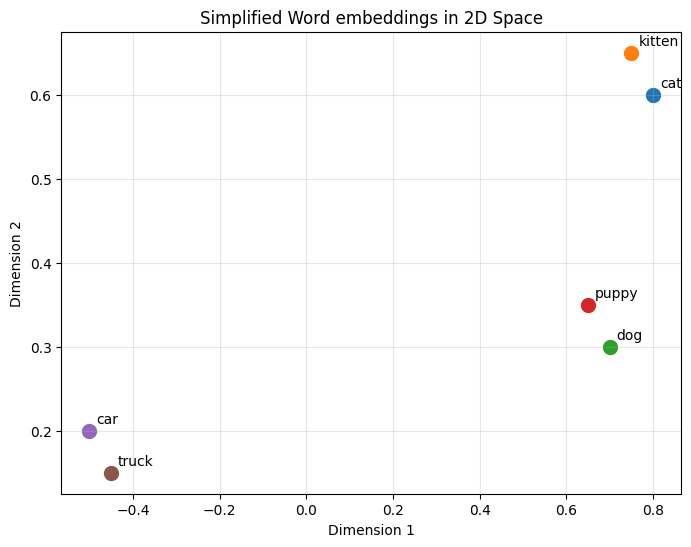

In [3]:
fig,ax = plt.subplots(figsize=(8,6))

for word,coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word,(coords[0],coords[1]), xytext=(5,5),
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word embeddings in 2D Space')
ax.grid(True,alpha=0.3)
plt.show()

# Measuring Similarity

In [4]:
def consine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectorss
    - Result close to 1: very similar
    - Result close to 0: Not Related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)
    

In [12]:
#example
cat_vector=[0.8, 0.6, 0.3]
kitten_vector=[0.75,0.65,0.35]
car_vector=[-0.5,0.2,0.1]

cat_kitten_similarity=consine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


# CReate Your First Embeddings

In [13]:
 ###Hugging Face & OpenAI Models
 from langchain_huggingface import HuggingFaceEmbeddings

 ##Initialize a simple Embedding model(no API Key needed!)
 embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
 )
 embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [14]:
##Create your first embeddings
text="Hello, I am learning embeddings"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length: {len(embedding)}")
print(embedding)

Text: Hello, I am learning embeddings
Embedding length: 384
[-0.01584901101887226, -0.11090175062417984, 0.03238550201058388, -0.015211974270641804, -0.0032525495626032352, 0.05293719470500946, 0.02946404181420803, 0.021722910925745964, 0.02998867817223072, -0.027794089168310165, 0.028750192373991013, 0.04406613111495972, 0.03279091417789459, 0.020626090466976166, -0.06037343293428421, -0.0004555478226393461, 0.06386067718267441, 0.05398113280534744, -0.0771317109465599, -0.01500827819108963, -0.05632077530026436, -0.03000508062541485, 0.044476740062236786, -0.07640556246042252, 0.033858172595500946, -0.02052098885178566, -0.007360897026956081, 0.07030624896287918, 0.1159147098660469, -0.07865743339061737, 0.05404296889901161, -0.056869834661483765, -0.019562916830182076, 0.0679268017411232, -0.0449586883187294, 0.10636639595031738, 0.023690294474363327, -0.011288455687463284, -0.05472811684012413, 0.004648775793612003, 0.02011789008975029, 0.03533411771059036, -0.0051590027287602425, 

In [16]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

#for single sentence --> use embed query
#for multiple sentences --> use embed_documents

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])

print(embedding_sentence[1])
print(len(embedding_sentence[1]))

[0.1304018646478653, -0.011870092712342739, -0.028117021545767784, 0.05123866721987724, -0.05597447603940964, 0.030191542580723763, 0.0301612988114357, 0.024698395282030106, -0.018370550125837326, 0.05876676365733147, -0.02495318278670311, 0.0601542592048645, 0.039831746369600296, 0.033230509608983994, -0.061311349272727966, -0.049373116344213486, -0.05486350879073143, -0.04007606953382492, 0.056429121643304825, 0.039156582206487656, -0.03473709151148796, -0.013247676193714142, 0.031966209411621094, -0.06349921226501465, -0.06017857789993286, 0.07823451608419418, -0.02830391190946102, -0.04744282737374306, 0.04035929590463638, -0.006630908697843552, -0.0667409598827362, -0.004191359970718622, -0.025311656296253204, 0.053341712802648544, 0.01742810197174549, -0.09792360663414001, 0.006061285734176636, -0.06524165719747543, 0.045572616159915924, 0.023641815409064293, 0.0765848457813263, -0.010264340788125992, -0.004076807294040918, -0.06232285499572754, 0.033705271780490875, 0.0186611302

In [17]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications



In [ ]:
# import os
# from dotenv import load_dotenv
# load_dotenv()
# os.environ['OPEN_API_KEY']=os.getenv('OPEN_API_KEY')

In [18]:
# Example 2: Multiple texts at once
multiple_texts = [
    "Python is a programming language",
    "LangChain is a framework for LLM applications",
    "Embeddings convert text to numbers",
    "Vectors can be compared for similarity"
]

In [19]:
multiple_embeddings=embeddings.embed_documents(multiple_texts)
multiple_embeddings

[[-0.0353708453476429,
  0.03816499188542366,
  -0.041260119527578354,
  0.016068750992417336,
  -0.03836706653237343,
  -0.13447058200836182,
  0.035737019032239914,
  0.042296767234802246,
  -0.03464675694704056,
  -0.026431972160935402,
  -0.04449024051427841,
  0.0244822446256876,
  0.0947517678141594,
  0.017094872891902924,
  0.05699915066361427,
  -0.05471819266676903,
  -0.08704373985528946,
  -0.004238341934978962,
  0.01999489963054657,
  -0.11494336277246475,
  -0.03674178943037987,
  0.05906214937567711,
  -0.03329762816429138,
  0.023044893518090248,
  0.015700433403253555,
  -0.00324603752233088,
  -0.009961207397282124,
  -0.01881144754588604,
  0.023121891543269157,
  -0.002396755386143923,
  -0.052372872829437256,
  0.09519390016794205,
  0.05609040707349777,
  0.034230221062898636,
  0.018951289355754852,
  0.05959983542561531,
  -0.005562822800129652,
  -0.09742436558008194,
  -0.055951837450265884,
  0.003304234938696027,
  -0.06094694137573242,
  0.0164042860269546

In [ ]:
print("\n Multiple Text Embeddings : ")
print(f"Number of texts: {len(multiple_texts)}")
print(f"Number of embeddings: {len(multiple_embeddings)}")
print(f"Each embedding size: {len(multiple_embeddings[0])}")


 Multiple Text Embeddings : 
Number of texts: 4
Number of embeddings: 4
Each embedding size: 384


## Finding the similarity b/w all the combinations of the sentences using cosine similarity

In [25]:
##Calculate the similarity b/w all pairs
for i in range(len(multiple_embeddings)):
    for j in range(i+1, len(multiple_embeddings)):

        similarity=consine_similarity(multiple_embeddings[i],multiple_embeddings[j])
        print(f" '{multiple_texts[i]}' vs '{multiple_texts[j]}' ")
        print(f"Similarity: {similarity:.3f}\n")

 'Python is a programming language' vs 'LangChain is a framework for LLM applications' 
Similarity: 0.237

 'Python is a programming language' vs 'Embeddings convert text to numbers' 
Similarity: 0.038

 'Python is a programming language' vs 'Vectors can be compared for similarity' 
Similarity: 0.067

 'LangChain is a framework for LLM applications' vs 'Embeddings convert text to numbers' 
Similarity: 0.109

 'LangChain is a framework for LLM applications' vs 'Vectors can be compared for similarity' 
Similarity: 0.057

 'Embeddings convert text to numbers' vs 'Vectors can be compared for similarity' 
Similarity: 0.232



In [29]:
### Example- Semantic Search- Retireve the similar sentence
# Test semantic search
documents = [
    "LangChain is a framework for developing applications powered by language models",
    "Python is a high-level programming language",
    "Machine learning is a subset of artificial intelligence",
    "Embeddings convert text into numerical vectors",
    "The weather today is sunny and warm"
]
query="What is Langchain?"

In [32]:
def semantic_search(query,documents,embeddings_models,top_k=3):
    """Simple semantic search implementation"""
    ## embed query & document
    query_embedding=embeddings.embed_query(query)
    doc_embeddings=embeddings.embed_documents(documents)

    ##calculate the similarity score
    similarities=[]

    for i,doc_emb in enumerate(doc_embeddings):
        similarity=consine_similarity(query_embedding,doc_emb)
        similarities.append((similarity,documents[i]))
    
    ## SOrt by similarity
    similarities.sort(reverse=True)
    return similarities[:top_k]


In [33]:
results=semantic_search(query,documents,embeddings)
results

[(np.float64(0.6586971581170749),
  'LangChain is a framework for developing applications powered by language models'),
 (np.float64(0.1603702661602405),
  'Python is a high-level programming language'),
 (np.float64(0.08682256570574612),
  'Machine learning is a subset of artificial intelligence')]

In [34]:
print(f"\n Semantic search results for : {query}")
for score,doc in results:
    print(f"Score: {score:.3f} | {doc}")


 Semantic search results for : What is Langchain?
Score: 0.659 | LangChain is a framework for developing applications powered by language models
Score: 0.160 | Python is a high-level programming language
Score: 0.087 | Machine learning is a subset of artificial intelligence


In [35]:
query2="What is embeddings"
results1=semantic_search(query2,documents,embeddings)
results1

[(np.float64(0.598715239111479),
  'Embeddings convert text into numerical vectors'),
 (np.float64(0.22202920297063883),
  'Machine learning is a subset of artificial intelligence'),
 (np.float64(0.17170119347037088),
  'LangChain is a framework for developing applications powered by language models')]